# Sentiment analysis with Logistic Regression

## SetUp

In [4]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import random

In [5]:
def draw_line(a,b,c, color='black', linewidth=2.0, linestyle='solid', starting=0, ending=3):
    # Plotting the line ax + by + c = 0
    # y = -(ax+c)/b
    x = np.linspace(starting, ending, 1000)
    plt.plot(x, -c/b - a*x/b, linestyle=linestyle, color=color, linewidth=linewidth)

### Generate Data from Normal Distribution

In [6]:
# Set the random seed for reproducibility
np.random.seed(42)
n_samples = 1000     # number of data points

# Create two features, X1 and X2 with normal distribution (mean=0 and std=1)
X1 = np.random.normal(loc=0, scale=1, size=n_samples)
X2 = np.random.normal(loc=0, scale=1, size=n_samples)

# Create the target variable, Y, based on a linear decision boundary
Y = np.where(X1 + X2 > 0, 1, 0)

data = pd.DataFrame({'X1': X1, 'X2': X2, 'Y': Y})
data.head()


,X1,X2,Y
0,0.496714,1.399355,1
1,-0.138264,0.924634,1
2,0.647689,0.059630,1
3,1.523030,-0.646937,1
4,-0.234153,0.698223,1


### Plotting the points

In [7]:
def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    pos = data[data['Y']==1]
    neg = data[data['Y']==0]
    plt.scatter(pos['X1'],
                pos['X2'],
                s = 20,
                color = 'blue',
                edgecolor = 'k',
                marker = '^')
    plt.scatter(neg['X1'],
                neg['X2'],
                s = 20,
                color = 'red',
                edgecolor = 'k',
                marker = 's')

    plt.xlabel('feature1')
    plt.ylabel('feature2')
    plt.legend(['positive','negative'])

In [8]:
features = data[['X1', 'X2']].values
features

array([[ 0.49671415,  1.39935544],
       [-0.1382643 ,  0.92463368],
       [ 0.64768854,  0.05963037],
       ...,
       [ 0.64084286, -0.88187465],
       [-0.57117899, -0.16306696],
       [ 0.57258278, -0.74490264]])

In [9]:
labels = data['Y'].values
labels[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

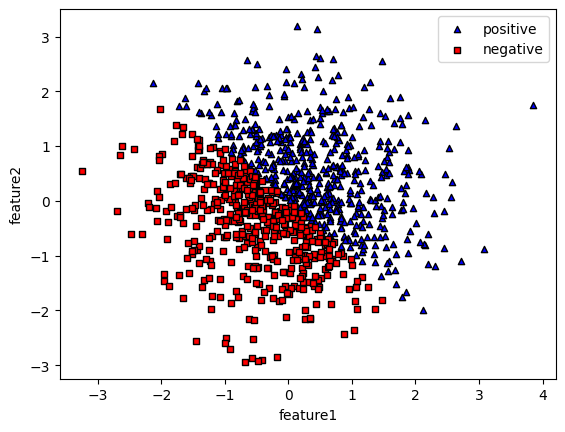

In [43]:
plt.Figure(figsize=(8,6))
plot_points(features, labels)

## Logistic Regression

In [44]:
def sigmoid(x):
    """
    Applies the sigmoid function to an input.
    Args:
        x: the given score of data point.
    """
    return np.exp(x)/(1 + np.exp(x))

In [45]:
def score(weights, bias, features):
    """
    Calculates the weighted sum of features with bias.
    Args:
        weights : An array of weights for each feature (trained weights).
        bias    : The bias term (trained weights).
        features: An array of feature values for given data point.
    """

    # dot product between vectors (x1, x2, … , xn) and (w1, w2, … , wn)
    # w1 x1 + w2 x2 + … + wn xn
    return np.dot(weights, features) + bias

In [46]:
def prediction(weights, bias, features):
    """
    Predicts the probability of the positive class using a sigmoid function.
    Args:
        weights : An array of weights for each feature.
        bias    : The bias term.
        features: An array of feature values.

    """
    # ŷ = σ(w1x1 + w2x2 + … + wnxn + b) = σ(Σw_i x_i + b).
    return sigmoid(score(weights, bias, features))

In [47]:
def log_loss(weights, bias, features, label):
    """
    Calculates the log loss for a single data point.
    Args:
        weights : An array of weights for each feature.
        bias    : The bias term.
        features: An array of feature values.
        label   : The true label (0 or 1).
    """
    # log loss = –y ln(ŷ) – (1 – y) ln(1 – y).
    pred = 1.0 * prediction(weights, bias, features)
    return -label*np.log(pred) - (1-label)*np.log(1-pred)

In [48]:
def total_log_loss(weights, bias, features, labels):
    """
    Calculates the total log loss for a whole dataset.
    Args:
        weights : An array of weights for each feature.
        bias    : The bias term.
        features: A list of feature arrays for each data point.
        labels  : A list of true labels for each data point.
    """
    
    total_error = 0
    for i in range(len(features)):
        total_error += log_loss(weights, bias, features[i], labels[i])
    return total_error

In [49]:
def logistic_trick(weights, bias, features, label, learning_rate = 0.01):
    """
    Updates weights and bias using the logistic regression update rule.
    Args:
        weights      : An array of weights for each feature.
        bias         : The bias term.
        features     : An array of feature values.
        label        : The true label (0 or 1).
        learning_rate: The learning rate for weight updates.

    """
    # ∇J = (y – ŷ)
    # w_new → w_old + x_i * ∇J 
    
    # w_i → w_i + η(y – ŷ)x_i         for i = 1, 2, … , n
    # b   → b + η(y – ŷ)              for i = 1, 2, … , n.

    pred = prediction(weights, bias, features)
    for i in range(len(weights)):
        weights[i] += (label-pred)*features[i]*learning_rate
    bias += (label-pred)*learning_rate
    return weights, bias

In [50]:
[1.0 for i in range(len(features[0]))]

[1.0, 1.0]

In [51]:
def logistic_regression_algorithm(features, labels, learning_rate = 0.01, epochs = 1000):
    """
    Performs logistic regression using stochastic gradient descent.

        - This function implements the logistic regression algorithm to find weights
          and bias that best separate data points into two classes. 

        - It uses stochastic gradient descent to iteratively update the weights and bias based on a 
          randomly selected data point at each epoch. 
            1. Initialize weights and bias
            2. Calculate the total log loss
            3. Update weights and bias
            4. repeat 2 and 3 with number of iteration = epochs number

        - The progress of the algorithm is visualized by plotting the decision boundary and the error over epochs.

    Args:
        features     : A NumPy array of feature vectors for each data point.
        labels       : A NumPy array of labels (0 or 1) for each data point.
        learning_rate: The step size for weight and bias updates.
        epochs       : The number of iterations (epochs) to run the algorithm.

    Returns:
        A tuple containing the final weights and bias.
    """

    # 1. Initialize weights and bias
    weights = [1.0 for i in range(len(features[0]))]  
    bias = 0.0  

    # Lists to store errors and plot data for each epoch
    errors = []  

    # Visualize data points
    plot_points(features, labels) 

    # Stochastic Gradient Descent Loop
    for i in range(epochs):
        
        # Visualize the decision boundary at each epoch
        draw_line(weights[0], weights[1], bias, color='grey', linewidth=0.1, linestyle='dotted')  # Assuming you have a 'draw_line' function
        
        # 2. Calculate and store the total log loss
        errors.append(total_log_loss(weights, bias, features, labels))

        # Randomly select a data point for update
        j = random.randint(0, len(features)-1) 

        # 3. Update weights and bias using the logistic trick
        weights, bias = logistic_trick(weights, bias, features[j], labels[j])

    # Visualize the final decision boundary
    draw_line(weights[0], weights[1], bias)

    # Show the plots
    plt.show()

    # Plot the error over epochs
    plt.scatter(range(epochs), errors)
    plt.xlabel('epochs')
    plt.ylabel('error')
    plt.show()

    return weights, bias 

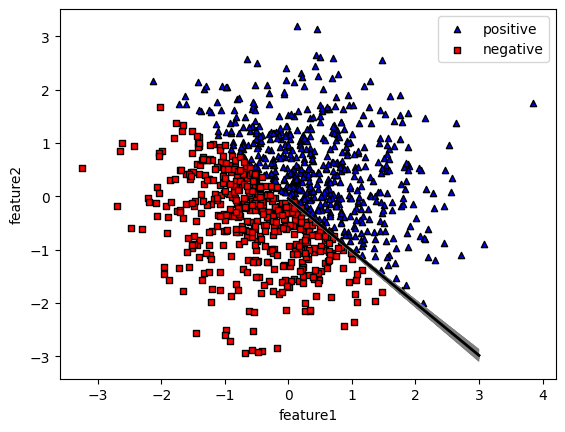

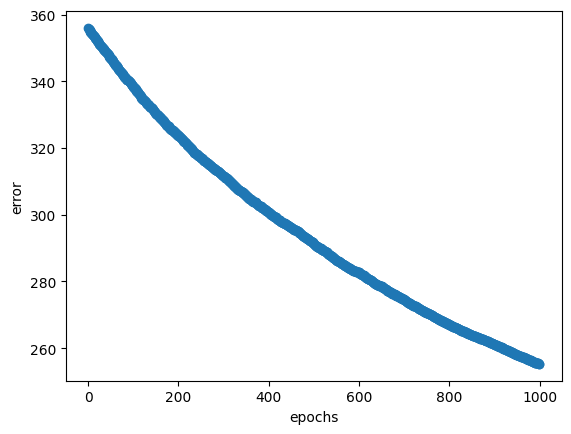

([1.6781982688415393, 1.7137566042692305], 0.07448771826943408)

In [52]:
logistic_regression_algorithm(features, labels)

### Use Scikit-Learn

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [53]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state = 42, max_iter= 150)

logreg.fit(features, labels)

LogisticRegression(max_iter=150, random_state=42)

In [54]:
# Set the random seed for reproducibility
np.random.seed(2024)
n_samples = 200     # number of data points

# Create two features, X1 and X2 with normal distribution (mean=0 and std=1)
X1_test = np.random.normal(loc=0, scale=1, size=n_samples)
X2_test= np.random.normal(loc=0, scale=1, size=n_samples)

# Create the target variable, Y, based on a linear decision boundary
Y_test = np.where(X1_test + X2_test > 0, 1, 0)

test_data = pd.DataFrame({'X1': X1_test, 'X2': X2_test, 'Y': Y_test})
X_test, y_test = test_data[['X1', 'X2']].values , test_data['Y'].values 

In [55]:
print("train accuracy: {} ".format(logreg.score(features, labels)))
print("test accuracy: {} ".format(logreg.score(X_test, y_test)))

train accuracy: 0.997 
test accuracy: 0.995 
